In [2]:
import pandas as pd  
import numpy as np  # For numerical operations
import scipy.stats  # For statistical functions, such as Pearson's correlation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import weeather data
weather = pd.read_csv('weather.csv')
display(weather.head())
weather.info()
weather.describe()
weather.isna().sum()
weather['Date'].value_counts()

Date  Minimum temperature (°C)  Maximum temperature (°C)  \
0  1/01/2023                      18.4                      35.9   
1  2/01/2023                      22.1                      32.0   
2  3/01/2023                      15.2                      21.1   
3  4/01/2023                      15.0                      18.7   
4  5/01/2023                      14.1                      21.6   

   Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
0            0.0               7.4              13.5   
1            6.4              13.4               9.3   
2            0.2               8.8               4.0   
3            0.0               6.0               0.0   
4            1.0               3.2               9.2   

   Speed of maximum wind gust (km/h) Time of maximum wind gust  \
0                                 31                     12:47   
1                                 52                      8:16   
2                                 37                     18:34   
3                                 52                     15:31   
4                                 39                     12:00   

   9am Temperature (°C)  9am relative humidity (%)  9am cloud amount (oktas)  \
0                  24.6                         65                       1.0   
1                  28.6                         47                       7.0   
2                  17.4                         68                       8.0   
3                  15.6                         62                       7.0   
4                  18.4                         66                       1.0   

   9am wind speed (km/h)  9am MSL pressure (hPa)  3pm Temperature (°C)  \
0                      7                  1010.8                  35.3   
1                     22                  1005.9                  21.1   
2                     11                  1010.2                  20.5   
3                     13                  1010.7                  16.0   
4                     13                  1014.9                  20.8   

   3pm relative humidity (%)  3pm cloud amount (oktas)  3pm wind speed (km/h)  \
0                         34                         7                     11   
1                         80                         6                     13   
2                         58                         7                     17   
3                         76                         7                     22   
4                         65                         5                     15   

   3pm MSL pressure (hPa)  
0                  1007.4  
1                  1006.6  
2                  1008.9  
3                  1011.2  
4                  1014.3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               181 non-null    object 
 1   Minimum temperature (°C)           181 non-null    float64
 2   Maximum temperature (°C)           181 non-null    float64
 3   Rainfall (mm)                      181 non-null    float64
 4   Evaporation (mm)                   181 non-null    float64
 5   Sunshine (hours)                   181 non-null    float64
 6   Speed of maximum wind gust (km/h)  181 non-null    int64  
 7   Time of maximum wind gust          181 non-null    object 
 8   9am Temperature (°C)               181 non-null    float64
 9   9am relative humidity (%)          181 non-null    int64  
 10  9am cloud amount (oktas)           180 non-null    float64
 11  9am wind speed (km/h)              181 non-null    int64  

1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [3]:
#import performance percent data
performance = pd.read_csv('performance.csv')
display(performance.head())
performance.info()
performance.describe()
performance.isna().sum()
performance['Date'].value_counts()

Date  dest|scheduled  ontime|dest  ontime|scheduled  \
0  1/01/2023          0.9824       0.8987            0.8829   
1  2/01/2023          0.9816       0.9576            0.9400   
2  3/01/2023          0.8719       0.9212            0.8032   
3  4/01/2023          0.8254       0.9351            0.7718   
4  5/01/2023          0.8208       0.9388            0.7706   

   cancelled|scheduled  
0               0.0111  
1               0.0037  
2               0.0098  
3               0.0018  
4               0.0146

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 181 non-null    object 
 1   dest|scheduled       181 non-null    float64
 2   ontime|dest          181 non-null    float64
 3   ontime|scheduled     181 non-null    float64
 4   cancelled|scheduled  181 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.2+ KB


1/01/2023     1
25/04/2023    1
27/04/2023    1
28/04/2023    1
29/04/2023    1
             ..
4/03/2023     1
5/03/2023     1
6/03/2023     1
7/03/2023     1
30/06/2023    1
Name: Date, Length: 181, dtype: int64

In [4]:
weather['Date'] = pd.to_datetime(weather['Date'], dayfirst=True)
performance['Date'] = pd.to_datetime(performance['Date'],dayfirst=True)

In [5]:
# Merge data_daily and data_weather on 'Date'
merged_performance_weather = pd.merge(performance, weather, on='Date')

# Identify the numeric columns in the merged_data_daily_weather dataframe
numeric_columns_daily_weather = merged_performance_weather.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix_daily_weather = merged_performance_weather[numeric_columns_daily_weather].corr()

# Calculate absolute values of correlations
correlations_abs = correlation_matrix_daily_weather.abs()

# Sort the correlations based on the 'Daily_patronage ' column
sorted_columns = correlations_abs['ontime|dest'].sort_values(ascending=False).index

# Reorder the columns and the rows based on the sorted column names
sorted_correlation_matrix = correlations_abs[sorted_columns].reindex(sorted_columns)

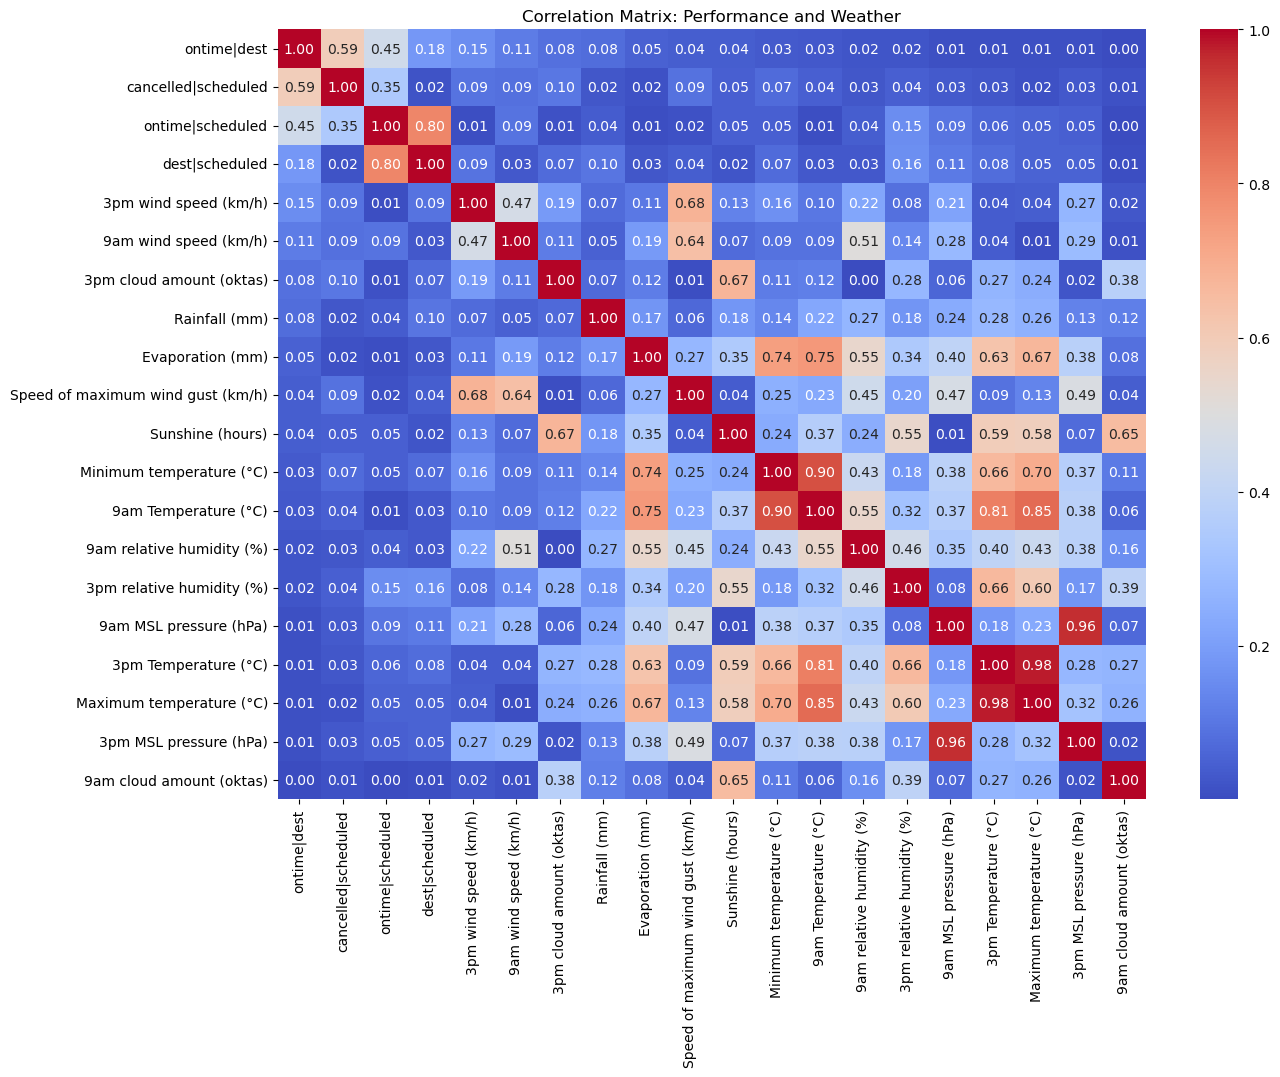

In [6]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(sorted_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Performance and Weather')
plt.show()


In [7]:
# Sort the correlations based on the 'Daily_patronage ' column
sorted_columns1 = correlations_abs['ontime|scheduled'].sort_values(ascending=False).index

# Reorder the columns and the rows based on the sorted column names
sorted_correlation_matrix1 = correlations_abs[sorted_columns1].reindex(sorted_columns1)

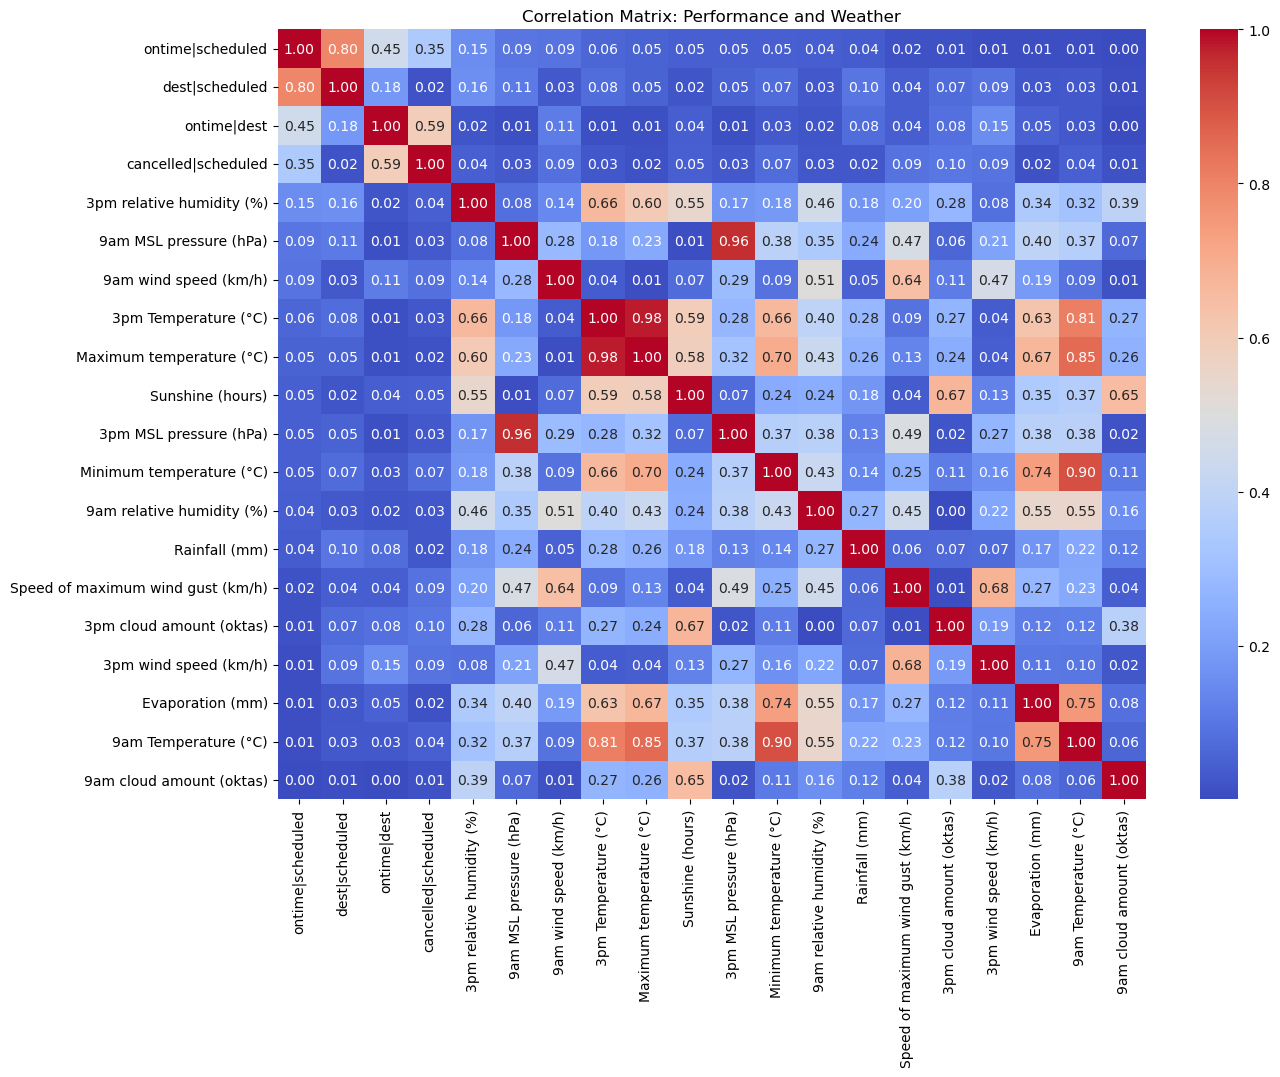

In [9]:
 #Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(sorted_correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Performance and Weather')
plt.show()
